In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import stats, spatial
import pickle
import csv
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  # This is added back by InteractiveShellApp.init_path()


In [2]:
tfidf_path = '../../data/tfidf_merged_chs_202001_full/'

In [3]:
lda_path = '../../data/lda_merged_chs_202001_full/'

In [4]:
fandom_list = [item for item in os.listdir(lda_path) if 'tsv' in item]

In [5]:
fandom_list = [item.split('_temporal')[0] for item in fandom_list]

In [6]:
fandom_list

['hetalia_axis_powers',
 'doctor_who_&_related_fandoms',
 'attack_on_titan',
 'buffy_the_vampire_slayer',
 'the_walking_dead_&_related_fandoms',
 'shakespare_william_works',
 'dragon_age_all_media_types',
 'sherlock_holmes_&_related_fandoms',
 'harry_potter',
 'arthurian_mythology_&_related_fandoms',
 'one_direction',
 'tolkien_j_r_r_works_&_related_fandoms',
 'naruto',
 'supernatural',
 'bishoujo_senshi_sailor_moon',
 'dcu',
 'hamilton_miranda',
 'star_wars_all_media_types',
 'marvel',
 'haikyuu',
 'kuroko_no_basuke',
 'les_miserables_all_media_types',
 'ms_paint_adventures']

In [7]:
# fandom_list

In [38]:
def normalize_dfs(df):
    
    # normalization of the success field
    df = df.replace([np.inf, -np.inf], np.nan)
    df['Hits'].fillna(0, inplace=True)
    df['Kudos'].fillna(0, inplace=True)
    df['Bookmarks'].fillna(0, inplace=True)
    df['Comments'].fillna(0, inplace=True)

    # normalize by chapter number
    df['Kudos'] = df['Kudos']/df['Chapters'] 
    df = df.replace([np.inf, -np.inf], np.nan)
    df['Kudos'].dropna()

    df['Hits'] = df['Hits']/df['Chapters']
    df = df.replace([np.inf, -np.inf], np.nan)
    df['Hits'].dropna()

    df['Bookmarks'] = df['Bookmarks']/df['Chapters']
    df = df.replace([np.inf, -np.inf], np.nan)
    df['Bookmarks'].dropna()
    return df

In [39]:
def check_dist(fandom_name):
    df_topic = pd.read_csv(os.path.join(lda_path, fandom_name + \
                                        '_temporal_lda_jsd_toprev_with_dist_merged_chs_no_text.tsv'), sep='\t')
    df_topic = normalize_dfs(df_topic)
    # highest 10%
    topic_high_th = np.percentile(df_topic.JSD,90)
    # lowest 10%
    topic_low_th = np.percentile(df_topic.JSD, 10)
    topic_high = df_topic[df_topic.JSD > topic_high_th ]
    topic_mod = df_topic[(df_topic.JSD <= topic_high_th) & (df_topic.JSD > topic_low_th) ]
    topic_low = df_topic[df_topic.JSD < topic_low_th ]

    plt.figure()
    plt.hist(topic_high.Kudos, density=True, alpha=0.5, label='high novelty')
#     plt.yscale('log')
    plt.title(fandom_name + ' ' + 'Topic')
    plt.hist(topic_mod.Kudos, density=True, alpha=0.5, label='mid novelty')
#     plt.yscale('log')
    plt.hist(topic_low.Kudos, density=True, alpha=0.5, label='low novelty')
    plt.yscale('log')
    plt.legend()
    
    df_term = pd.read_csv(os.path.join(tfidf_path, fandom_name + \
                                       '_temporal_tfidf_cos_merged_chapters_full.tsv'), sep='\t')
    df_term = normalize_dfs(df_term)
#     print(fandom_name)
#     print(np.percentile(df_term.Cos, 90))
#     print(np.percentile(df_term.Cos, 10))
    # highest 10%
    term_high_th = np.percentile(df_term.Cos, 90)
    # lowest 10%
    term_low_th = np.percentile(df_term.Cos, 10)
    term_high = df_term[df_term.Cos > term_high_th ]
    term_mod = df_term[(df_term.Cos <= term_high_th) & (df_term.Cos > term_low_th) ]
    term_low = df_term[df_term.Cos < term_low_th ]

    plt.figure()
    plt.hist(term_high.Kudos, density=True, alpha=0.5, label='high novelty')
    plt.yscale('log')
    plt.title(fandom_name + ' term')
    plt.hist(term_mod.Kudos, density=True, alpha=0.5, label='mid novelty' )
    plt.yscale('log')
    plt.hist(term_low.Kudos, density=True, alpha=0.5, label='low novelty')
    plt.yscale('log')
    plt.legend()

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control thi

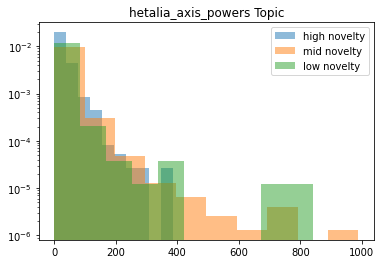

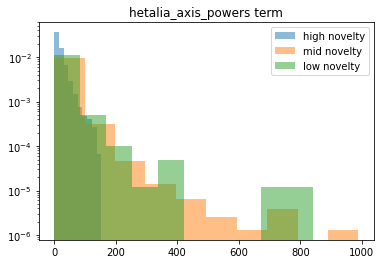

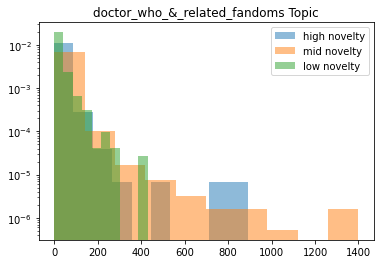

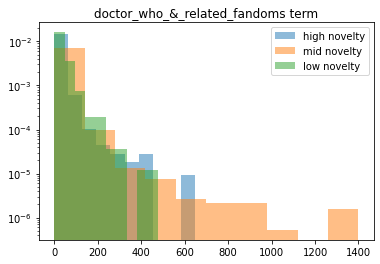

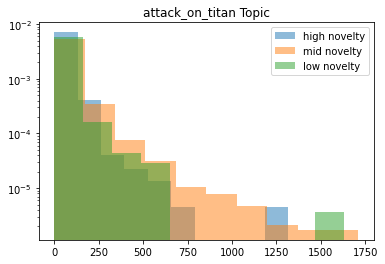

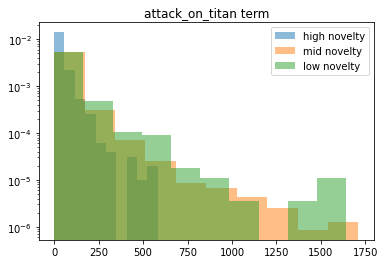

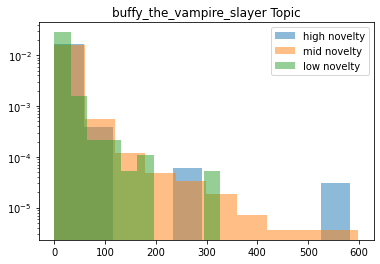

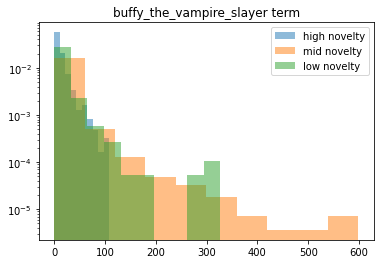

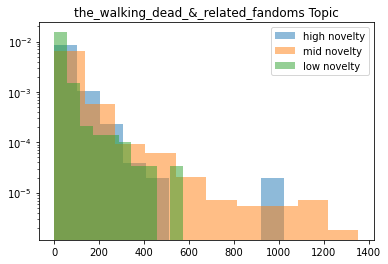

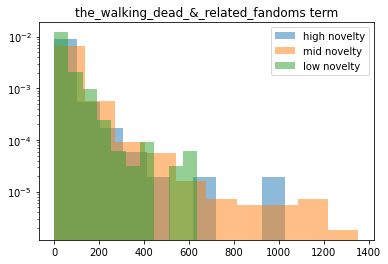

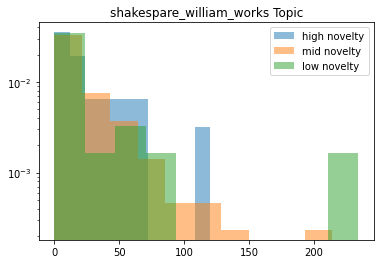

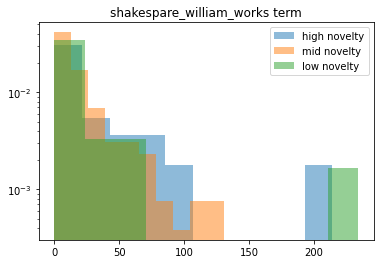

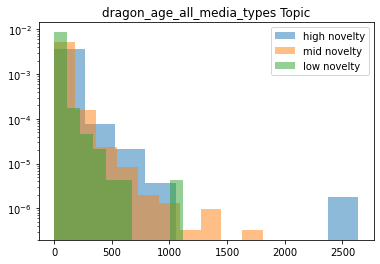

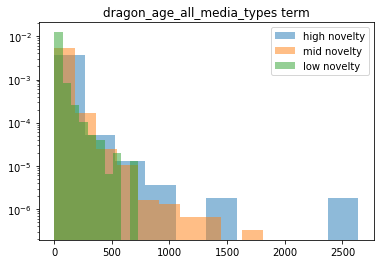

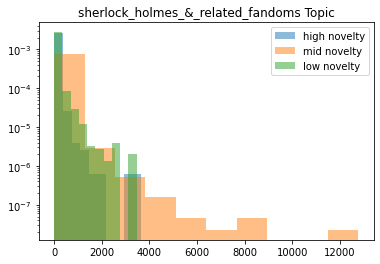

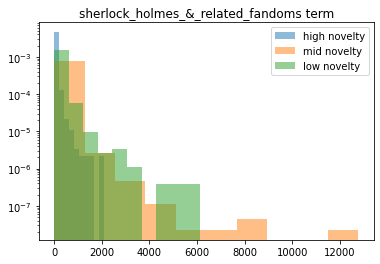

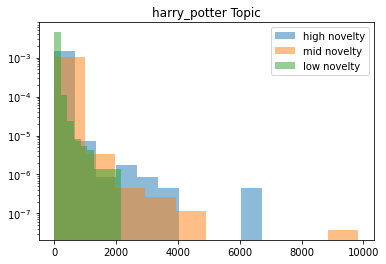

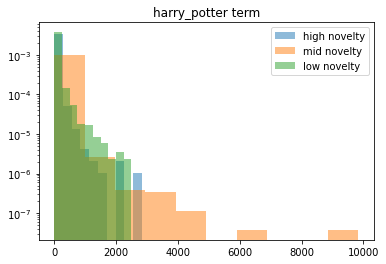

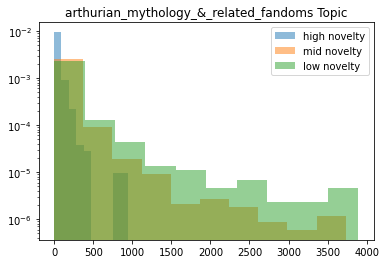

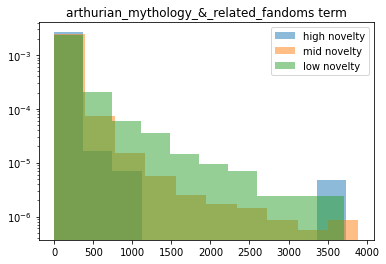

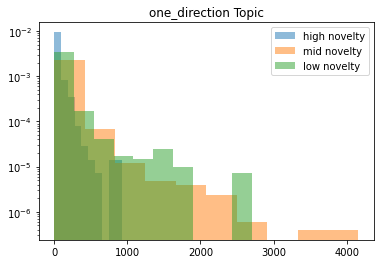

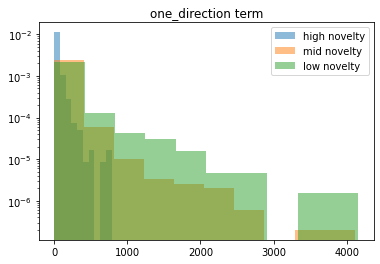

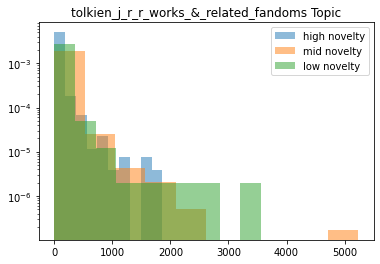

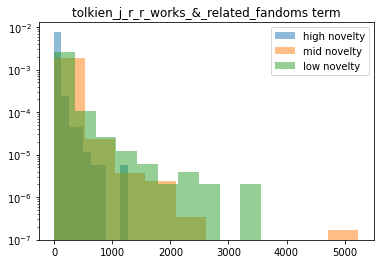

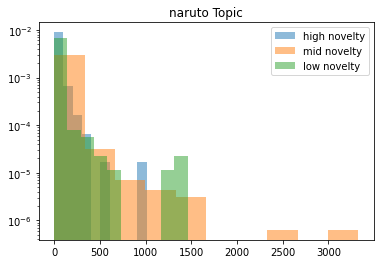

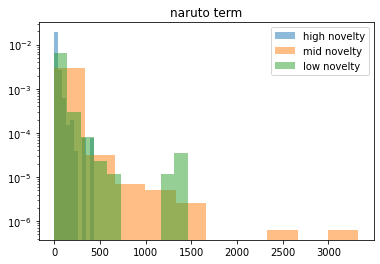

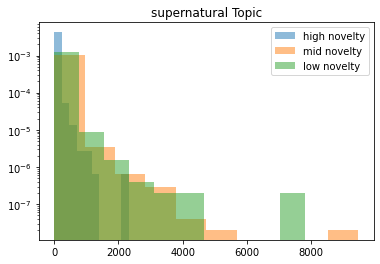

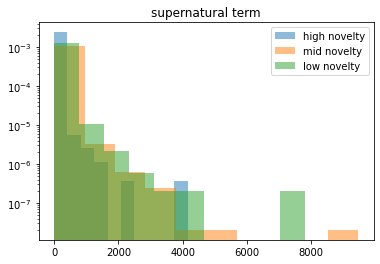

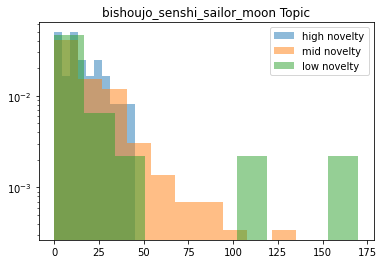

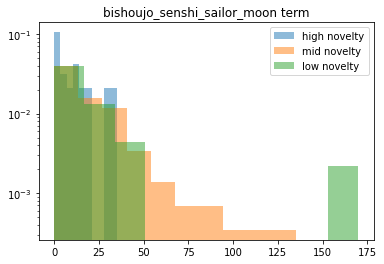

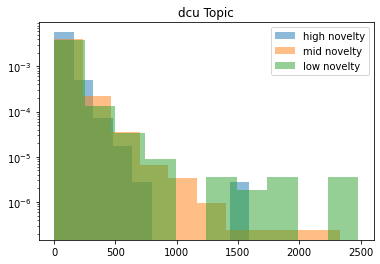

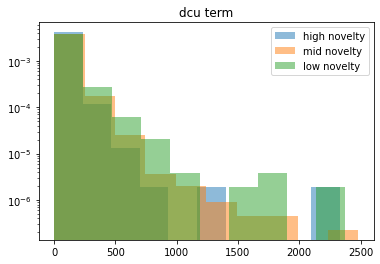

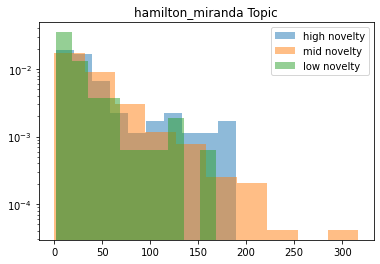

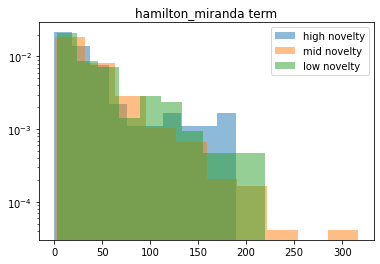

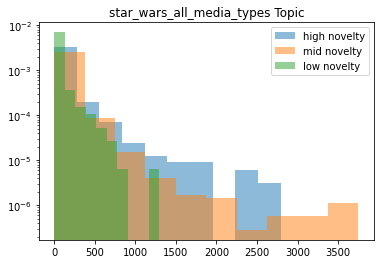

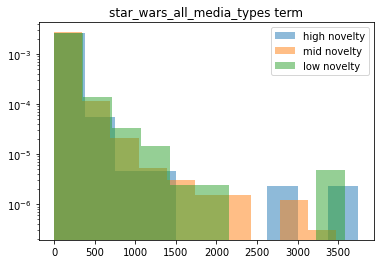

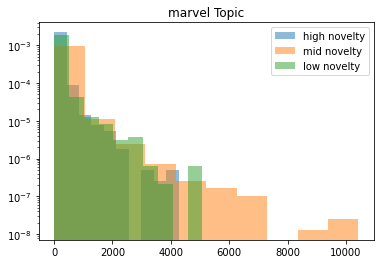

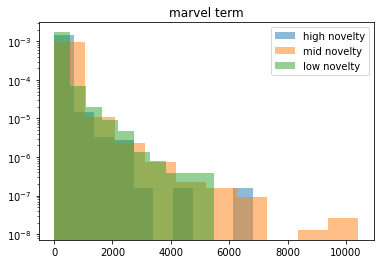

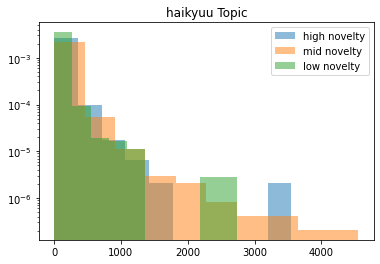

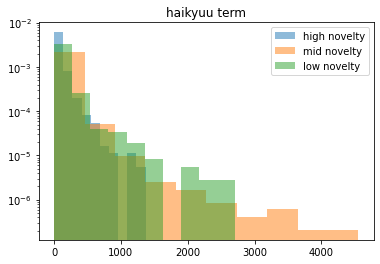

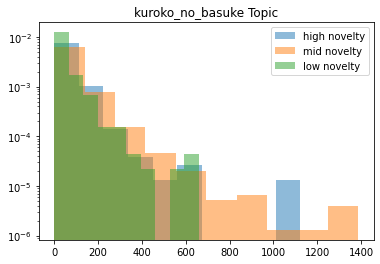

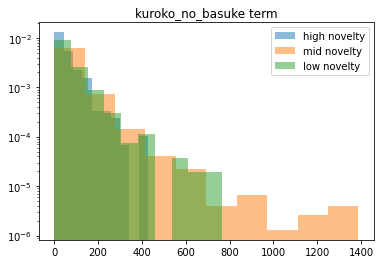

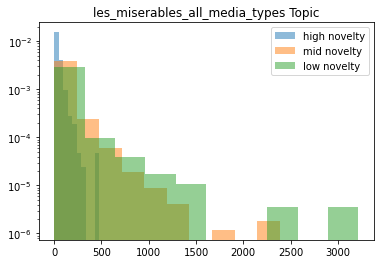

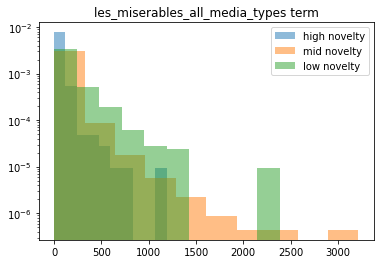

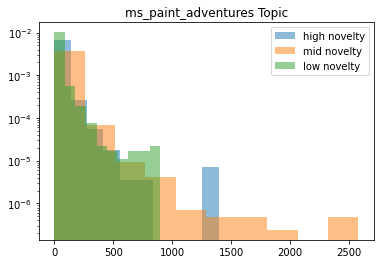

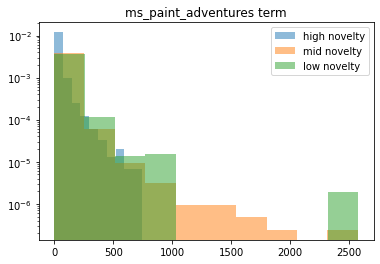

In [40]:
for fandom in fandom_list:
    check_dist(fandom)

In [43]:
marvel = pd.read_csv(tfidf_path+'marvel_temporal_tfidf_cos_merged_chapters_full.tsv', sep='\t')

In [44]:
marvel.head(2)

,index,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,Chapters,Characters,Fandoms,Hits,...,Relationship,Title,Words,PublishDate,UpdateDate,CompleteDate,Comments,URL,Cos,Entropy
0,1142,AU,No Archive Warnings Apply,inlovewithnight,4,F/M,1,"Scott Summers, Jean Grey, Logan",['X-Men (Movieverse)'],263.0,...,Scott Summers/Jean Grey,Eyes Burning Bright,2838.0,2009-11-21,NaN,2009-11-21,0,http://archiveofourown.org/works/18238?view_ad...,0.344911,5.514196
1,1832,"AU, What-If",No Archive Warnings Apply,Lys ap Adin,8,M/M,1,"Wolverine, Gambit",['X-Men (Movieverse)'],1329.0,...,Wolverine/Gambit,"These Fragments, Against Ruin",2148.0,2009-11-14,NaN,2009-11-14,2,http://archiveofourown.org/works/9198?view_adu...,0.441596,5.457043


In [55]:
marvel[marvel.Title.str.contains('Mistake')].Title.tolist()

['Traveled This Far on the Back of Every Mistake',
 'Mistaken Identity',
 'The Best Mistake to Make',
 'Everything (The Last Mistake)',
 'Rookie Mistake',
 'My Game, Your Mistake',
 'All That Love, All Those Mistakes',
 'Mistakes',
 'The Mistake',
 'Trolling the Press: Mistakes Have Been Made',
 'Fighting Not to Make Mistakes',
 'An Honest Mistake',
 'Mistake',
 'Repeating Past Mistakes',
 'A Big Mistake',
 'Mistakes',
 'My Only Mistake',
 "Mistakes (or I\\'m Blue, Da Ba De)",
 'Maladjusted Geniuses and Mistaken Heroes',
 'Innocent Mistakes',
 'Fate Made A Mistake',
 "These Facts We\\'ve Mistaken for Our Lives",
 'The French Mistake',
 'Babysitting Mistake',
 'One Mistake is Not a Crime',
 'Fun with Mistaken Identities?',
 'Mistakes are made, but Prices need to be paid',
 'When Ashes Fall And Are Mistaken For Snow',
 'Mistaken Identity',
 'The Worst Mistakes',
 'A Beautiful Mistake',
 'A Case of Mistaken Identities',
 'Mistakes',
 'Mistakes we made',
 'Just One Mistake',
 'Mistaken Ide

In [10]:
df = pd.read_csv('../../data/fanfic_regression_data_merged_chs.tsv', sep='\t')

In [11]:
df.head(2)

,Bookmarks,Chapters,Hits,Kudos,Words,Comments,URL,Term_novelty,Entropy,Dist,...,Fandom_tolkien,Fandom_shakespare,Fandom_hetalia,Fandom_attack_on_titan,Fandom_ms_paint_adventures,Fandom_marvel,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History
0,21,24,2399.0,53.0,66258.0,16,http://archiveofourown.org/works/488677/chapte...,0.603058,5.315078,"[0.000955473, 0.008187229, 0.0005799397, 0.001...",...,0,0,0,0,0,0,0,0,0,4280.0
1,7,1,2333.0,80.0,3542.0,3,http://archiveofourown.org/works/208853?view_a...,0.452716,5.723015,"[3.522977e-05, 1.2239097e-05, 0.16778131, 0.00...",...,0,0,0,0,0,0,0,0,0,4285.0


In [2]:
marvel_original = pd.read_csv('../../data/marvel_preprocessed.tsv', sep='\t')

In [5]:
del marvel_original['Text']

In [6]:
marvel_original.to_csv('marvel_preprocessed_notext.tsv', sep='\t')

In [3]:
marvel_original.head(2)

,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,ChapterIndex,Chapters,Characters,Comments,CompleteDate,...,Notes,PublishDate,Rating,Relationship,Summary,Text,Title,URL,UpdateDate,Words
0,"Polyamory, Threesome - M/M/M, Magical Healing ...",No Archive Warnings Apply,SailorChibi,2,M/MMulti,NaN,1,"Tony Stark, Pepper Potts, Steve Rogers, James ...",0,2016-05-14,...,I found this on my USB stick. I... don\'t even...,2016-05-14,Mature,"James ""Bucky"" Barnes/Steve Rogers/Tony Stark","""What, that fucking you might give you a bit o...",\nThe words don\'t really register until Peppe...,the (unexpected) side effects of really awesom...,http://archiveofourown.org/works/6845182?view_...,NaN,2277.0
1,"it\'s there if you squint okay, Originally Pos...",No Archive Warnings Apply,littleskywatcher,0,F/F,NaN,1,"Nita Callahan, Natasha Romanov",2,2016-02-16,...,\n Inspired by,2016-02-16,Not Rated,Nita Callahan/Natasha Romanov,"After Fury\'s death, Nita gets an unexpected n...",\nNita\xe2\x80\x99s couch squeaks as someone p...,And the Moon Is No Dream,http://archiveofourown.org/works/6028957?view_...,NaN,1095.0


In [4]:
marvel_original[marvel_original.Title.str.contains('Groot')]

,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,ChapterIndex,Chapters,Characters,Comments,CompleteDate,...,Notes,PublishDate,Rating,Relationship,Summary,Text,Title,URL,UpdateDate,Words
141611,NaN,No Archive Warnings Apply,misura,7,Gen,NaN,1,"Groot (Marvel), Rocket Raccoon, Peter Quill, D...",2,2015-06-29,...,For isabeau.,2015-06-29,General Audiences,NaN,"""So how\'d the two of you meet, anyway?"" Quill...","\n""So how\'d the two of you meet, anyway?"" Qui...",I am Groot (the Lost Amongst the Idiots remix),http://archiveofourown.org/works/4227630,NaN,502.0
162686,Child Reader,No Archive Warnings Apply,KOREAlchemist,4,Other,NaN,1,"Groot, Rocket Raccoon, Reader",1,2015-01-05,...,NaN,2015-01-05,General Audiences,"Groot/ Reader, Groot x Reader",Flowers crowns are best when shared with friends!,\nFlower Crowns (Groot x Child! Reader)\xc2\xa...,Flower Crowns (Groot x Child! Reader),http://archiveofourown.org/works/3124838,NaN,592.0
177751,"Flora Colossus, Groot Must Grow, Reflection, P...",No Archive Warnings Apply,Cordelia_Sun,2,Gen,NaN,1,Rocket Raccoon,8,2015-01-04,...,NaN,2015-01-04,General Audiences,NaN,Clutching the fragmented remains of his friend...,"\nRocket sat in the bright, sterile room of Xa...",How to Grow a Groot,http://archiveofourown.org/works/3115325,NaN,701.0
203076,"Drabble, 3 parts, very introspective",Creator Chose Not To Use Archive Warnings,CMS521,3,M/MOther,NaN,1,"Drax the Destroyer, Groot (Marvel), Peter Quil...",2,2014-12-15,...,Also posted on Fanfiction.net under same usern...,2014-12-15,Teen And Up Audiences,Drax the Destroyer/Groot,So a 3 part growth of Drax and Groot\'s relati...,\nPart 1Groot understood a lot more than his f...,Groot and Drax\'s Budding Relathionship,http://archiveofourown.org/works/2776259,NaN,952.0
214908,"cumflation, Vomit, Sickness, Tentacles, Tentac...",Rape/Non-Con,DontBeAZombie,5,M/M,NaN,1,"Rocket Raccoon, Groot (Marvel), Peter Quill, S...",3,2014-12-04,...,Just trying to predict whats happening in the ...,2014-12-04,Explicit,Groot/Rocket Raccoon,Groot is taken over by a Symbiote.,"\n""Hey, Groot, hand me the thing with the thin...",The Symbiote Groot,http://archiveofourown.org/works/2715587?view_...,NaN,1262.0
215276,"Team Bonding, Humor, Team Dynamics, Team Fluff...",Creator Chose Not To Use Archive Warnings,RavenGrey,147,Other,NaN,1,"Peter Quill, Groot (Marvel), Drax the Destroye...",36,2014-08-12,...,Guess who saw Guardians of the Galaxy and love...,2014-08-12,General Audiences,NaN,It isn\xe2\x80\x99t the weirdest thing that\xe...,\n\xc2\xa0\n\xc2\xa0 \xc2\xa0 \xc2\xa0 \xc2\xa...,Daisy Chains (or Reasons Why Peter Can\'t Leav...,http://archiveofourown.org/works/2122635,NaN,2933.0
219999,"I had to do it, There are only 2 other fics of...",No Archive Warnings Apply,BenvolioPontmercy,31,Other,NaN,1,"Rocket Raccoon, Groot (Marvel)",18,2014-08-02,...,NaN,2014-08-02,General Audiences,Groot/Rocket Raccoon,Yes hello I just wrote a fic about a tree and ...,\n\xe2\x80\x9cI am Groot.\xe2\x80\x9dRocket Ra...,You Are Groot,http://archiveofourown.org/works/2066751,NaN,387.0
222003,NaN,Creator Chose Not To Use Archive Warnings,andrewshaffer,0,Gen,NaN,1,NaN,0,2014-12-23,...,NaN,2014-12-23,General Audiences,NaN,"Star-Lord, Groot, and the rest of the merry Gu...","\n""I...am...Groot.""\nPeter Quill\xe2\x80\x94a....",Merry Grootmas,http://archiveofourown.org/works/2829779,NaN,3269.0
228891,NaN,No Archive Warnings Apply,craziesun,16,Other,NaN,1,"Groot (Marvel), Rocket Raccoon, Groot",4,2014-08-01,...,NaN,2014-08-01,General Audiences,"Groot & Rocket Raccoon, Rocket Raccoon & Groot",Rocket thinks there may have been a huge fight...,\nThe dust had long settled on the Ravager shi...,That Time Groot and Rocket Won by Default,http://archiveofourown.org/works/2060592,NaN,831.0
236364,"One-Shot, Brotps, Comedy",No Archive Warnings Apply,Chelsea_Horror,3,NaN,1.0,3,"Gamora (Marvel), Groot (Marvel), Peter Quill, ...",0,NaN,...,"First real attempt at GOTG fanfiction,so yeah....",2014-08-19,General